# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime                         #  ------------------- fixed this 
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 624


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=275889680afc8a620cc08fbfdecc7161


In [5]:

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d')

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"Error for city {city}: {e}")
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sitka
Processing Record 2 of Set 1 | utrik
Processing Record 3 of Set 1 | west island
Processing Record 4 of Set 1 | puerto natales
Processing Record 5 of Set 1 | papatowai
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | arraial do cabo
Processing Record 8 of Set 1 | andergrove
Processing Record 9 of Set 1 | magway
Processing Record 10 of Set 1 | tiksi
Processing Record 11 of Set 1 | grand falls-windsor
Processing Record 12 of Set 1 | lebu
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | tranovaho
Error for city tranovaho: 'coord'
Processing Record 15 of Set 1 | broken hill
Processing Record 16 of Set 1 | nuuk
Processing Record 17 of Set 1 | blackmans bay
Processing Record 18 of Set 1 | itacoatiara
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | edinburgh of the seven seas
Processing Record 21 of Set 1 | scottsbluff
Proce

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          595
Lat           595
Lng           595
Max Temp      595
Humidity      595
Cloudiness    595
Wind Speed    595
Country       595
Date          595
dtype: int64

In [7]:
# Display sample data
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sitka,57.0531,-135.3300,42.69,70,0,3.44,US,2024-04-17
1,utrik,11.2278,169.8474,79.84,81,91,19.30,MH,2024-04-17
2,west island,-12.1568,96.8225,82.38,89,75,11.50,CC,2024-04-17
3,puerto natales,-51.7236,-72.4875,59.45,51,75,24.16,CL,2024-04-17
4,papatowai,-46.5619,169.4708,52.18,69,95,11.45,NZ,2024-04-17
5,waitangi,-43.9535,-176.5597,52.83,96,50,1.01,NZ,2024-04-17
6,arraial do cabo,-22.9661,-42.0278,87.76,65,0,14.97,BR,2024-04-17
7,andergrove,-21.0833,149.1833,74.66,85,55,9.82,AU,2024-04-17
8,magway,20.1500,94.9167,86.99,52,58,6.42,MM,2024-04-17
9,tiksi,71.6872,128.8694,10.18,89,88,8.72,RU,2024-04-17


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sitka,57.0531,-135.3300,42.69,70,0,3.44,US,2024-04-17
1,utrik,11.2278,169.8474,79.84,81,91,19.30,MH,2024-04-17
2,west island,-12.1568,96.8225,82.38,89,75,11.50,CC,2024-04-17
3,puerto natales,-51.7236,-72.4875,59.45,51,75,24.16,CL,2024-04-17
4,papatowai,-46.5619,169.4708,52.18,69,95,11.45,NZ,2024-04-17


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

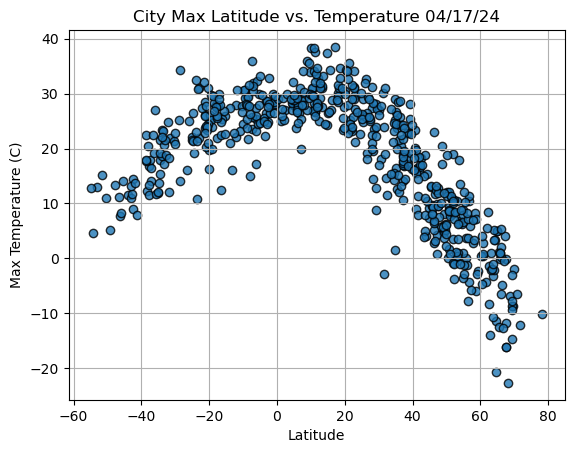

In [10]:
# Build scatter plot for latitude vs. temperature  # KEEP IN MIND HAVE TO CONVERT FAHRENHEIGHT TO CELSIUS
latitudes = city_data_df['Lat']  
max_temps = city_data_df['Max Temp Celsius'] = (city_data_df['Max Temp'] - 32) * 5/9   # https://stackoverflow.com/questions/61941652/python-create-a-function-to-convert-from-fahrenheit-to-celsius  
plt.scatter(latitudes, max_temps, edgecolor="black", linewidth=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

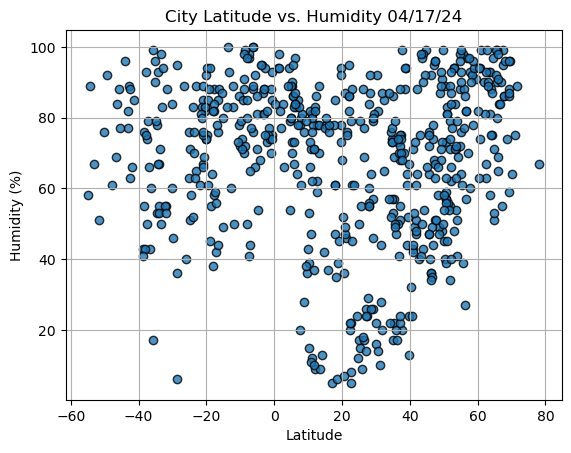

In [11]:
# Build the scatter plots for latitude vs. humidity
latitudes = city_data_df['Lat']  
humidity = city_data_df['Humidity'] 
plt.scatter(latitudes, humidity, edgecolor="black", linewidth=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

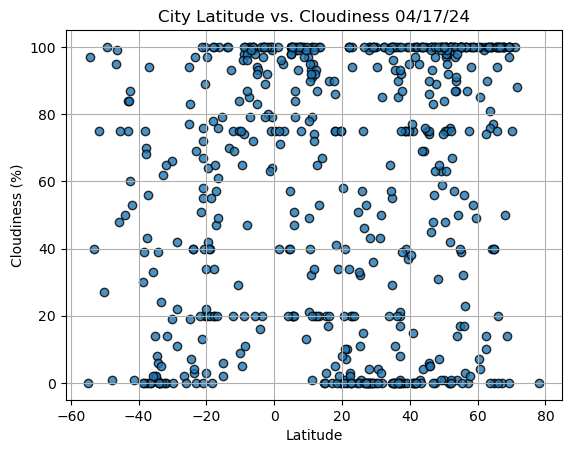

In [12]:
# Build the scatter plots for latitude vs. cloudiness
latitudes = city_data_df['Lat']  
cloudiness = city_data_df['Cloudiness'] 
plt.scatter(latitudes, cloudiness, edgecolor="black", linewidth=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

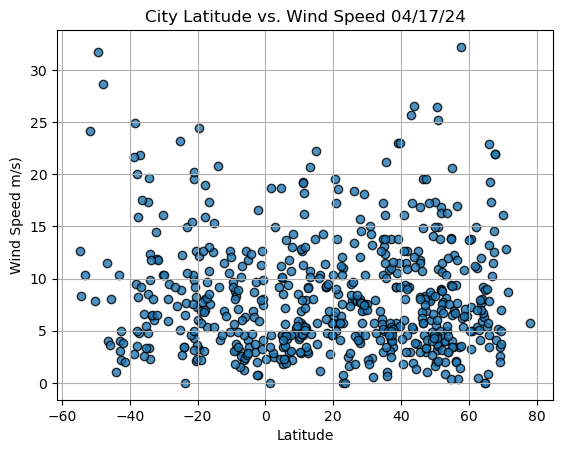

In [13]:
# Build the scatter plots for latitude vs. wind speed
latitudes = city_data_df['Lat']  
wind_speeds = city_data_df['Wind Speed'] 
plt.scatter(latitudes, wind_speeds, edgecolor="black", linewidth=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots


In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp Celsius
City_ID,,,,,,,,,,
0,sitka,57.0531,-135.3300,42.69,70,0,3.44,US,2024-04-17,5.938889
1,utrik,11.2278,169.8474,79.84,81,91,19.30,MH,2024-04-17,26.577778
8,magway,20.1500,94.9167,86.99,52,58,6.42,MM,2024-04-17,30.550000
9,tiksi,71.6872,128.8694,10.18,89,88,8.72,RU,2024-04-17,-12.122222
10,grand falls-windsor,48.9332,-55.6649,40.50,87,100,5.99,CA,2024-04-17,4.722222


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp Celsius
City_ID,,,,,,,,,,
2,west island,-12.1568,96.8225,82.38,89,75,11.50,CC,2024-04-17,27.988889
3,puerto natales,-51.7236,-72.4875,59.45,51,75,24.16,CL,2024-04-17,15.250000
4,papatowai,-46.5619,169.4708,52.18,69,95,11.45,NZ,2024-04-17,11.211111
5,waitangi,-43.9535,-176.5597,52.83,96,50,1.01,NZ,2024-04-17,11.572222
6,arraial do cabo,-22.9661,-42.0278,87.76,65,0,14.97,BR,2024-04-17,30.977778


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.78


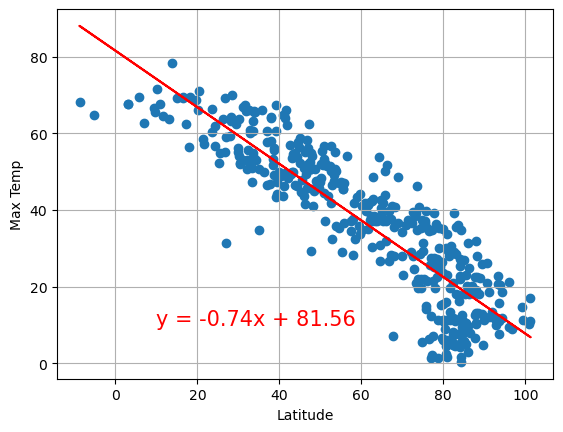

In [17]:
# # Linear regression on Northern Hemisphere
def plot_linear_regression(x_values, y_values, text_coordinates):
   
    (slope, intercept, r_value, _, _) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    

    print(f"The r-value is: {r_value**2:.2f}")  
    
  
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")

    plt.ylabel("Max Temp")
    plt.xlabel("Latitude")
    plt.grid(True)

    plt.savefig("output_data/Fig5.png")
    
    # Showing the plot
    plt.show()
    
    return slope, intercept, r_value

slope, intercept, r_value = plot_linear_regression(
    northern_hemi_df['Max Temp'], 
    northern_hemi_df['Lat'], 
    (10, 10))  

## Discussion

In [ ]:
The r-value of 0.78 shows a strong negative correlation between latitude and maximum temperature in the Northern Hemisphere. The regression equation y = -0.74x + 81.56 shows that as latitude increases the temperature drops.

The r-value is: 0.51


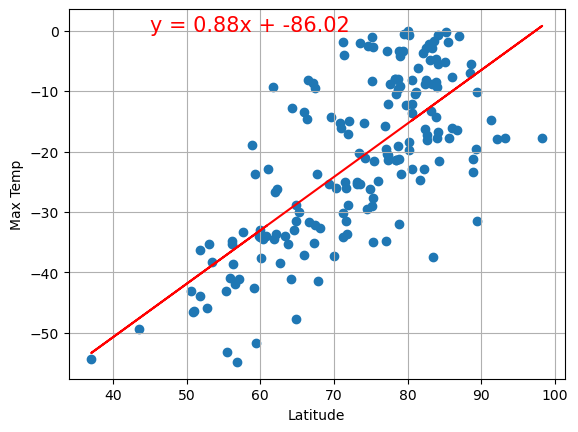

In [53]:
# Linear regression on Southern Hemisphere
def plot_linear_regression(x_values, y_values, text_coordinates):
   
    (slope, intercept, r_value, _, _) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    

    print(f"The r-value is: {r_value**2:.2f}")  
    
  
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")

    plt.ylabel("Max Temp")
    plt.xlabel("Latitude")
    plt.grid(True)

    plt.savefig("output_data/Fig6.png")
    
    # Showing the plot
    plt.show()
    
    return slope, intercept, r_value

slope, intercept, r_value = plot_linear_regression(
    southern_hemi_df['Max Temp'], 
    southern_hemi_df['Lat'], 
    (45, 0))  

**Discussion about the linear relationship:** YOUR RESPONSE HERE
The typical belief rings true that the temperature is hotter near the equator and the temperature is colder as we get closer towards the north and south poles.


## Discussion

In [ ]:
The r-value of 0.51 shows ae positive correlation between latitude and maximum temperature in the Southern Hemisphere. The regression equation y = 0.88x - 86.02, is a positive slope, shows that temperatures on occasion increase as one moves closer to the equator. This r-value suggests latitude is a important factor for influencing temperatures.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.02


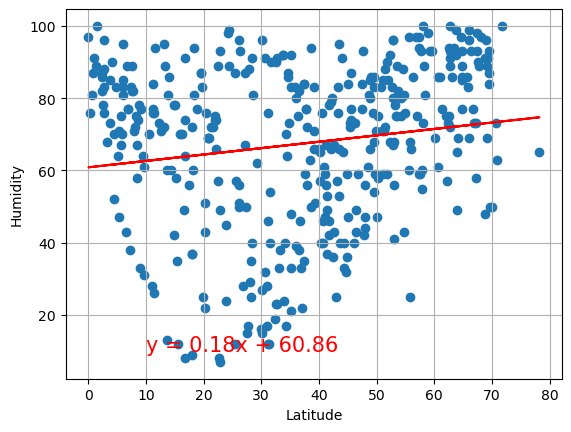

In [67]:
# Northern Hemisphere
# # Linear regression on Northern Hemisphere
def plot_linear_regression(x_values, y_values, text_coordinates):
   
    (slope, intercept, r_value, _, _) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    

    print(f"The r-value is: {r_value**2:.2f}")  
    
  
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")

    plt.ylabel("Humidity")
    plt.xlabel("Latitude")
    plt.grid(True)

    plt.savefig("output_data/Fig7.png")
    
    # Showing the plot
    plt.show()
    
    return slope, intercept, r_value

slope, intercept, r_value = plot_linear_regression(
    northern_hemi_df['Lat'], 
    northern_hemi_df['Humidity'], 
    (10, 10))  

## Discussion

In [ ]:
The r-value of 0.02 indicates a very weak correlation between latitude and humidity in the Northern Hemisphere. The regression equation y = 0.18x + 60.86, with its positive slope, shows that humidity increases a little with latitude.

The r-value is: 0.08


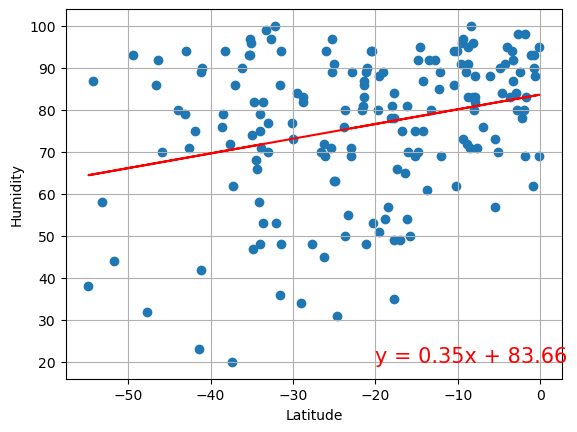

In [68]:
# Southern Hemisphere
def plot_linear_regression(x_values, y_values, text_coordinates):
   
    (slope, intercept, r_value, _, _) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    

    print(f"The r-value is: {r_value**2:.2f}")  
    
  
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")

    plt.ylabel("Humidity")
    plt.xlabel("Latitude")
    plt.grid(True)

    plt.savefig("output_data/Fig8.png")
    
    # Showing the plot
    plt.show()
    
    return slope, intercept, r_value

slope, intercept, r_value = plot_linear_regression(
    southern_hemi_df['Lat'], 
    southern_hemi_df['Humidity'], 
    (-20, 20))  

**Discussion about the linear relationship:** YOUR RESPONSE HERE
As we get closer towards the equator the humidity increases.

## Discussion

In [ ]:
The r-value of 0.08 shows a very weak  correlation between latitude and humidity in the Southern Hemisphere. The regression equation y = 0.35x + 83.66 showss a small chance for humidity to increase moving towards the equator.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.01


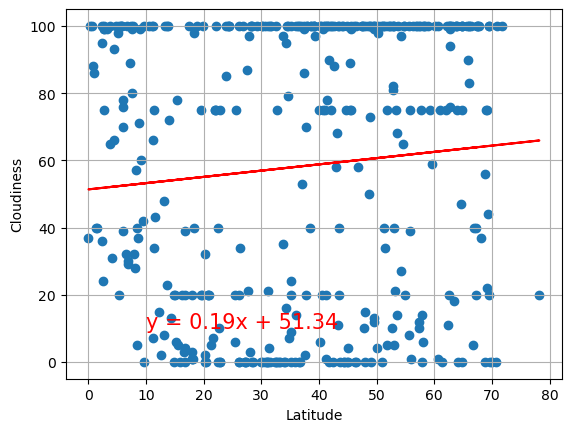

In [57]:
# Northern Hemisphere
def plot_linear_regression(x_values, y_values, text_coordinates):
   
    (slope, intercept, r_value, _, _) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    

    print(f"The r-value is: {r_value**2:.2f}")  
    
  
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")

    plt.ylabel("Cloudiness")
    plt.xlabel("Latitude")
    plt.grid(True)

    plt.savefig("output_data/Fig9.png")
    
    # Showing the plot
    plt.show()
    
    return slope, intercept, r_value

slope, intercept, r_value = plot_linear_regression(
    northern_hemi_df['Lat'], 
    northern_hemi_df['Cloudiness'], 
    (10, 10))  

## Discussion

In [ ]:
The r-value of 0.01 shows a very weak correlation between latitude and cloudiness. The regression equation y = 0.19x + 51.34 shows that cloudiness has a small increase as latitude increases.

The r-value is: 0.04


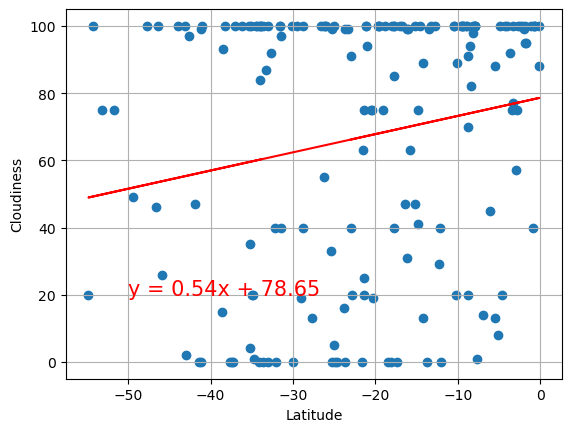

In [58]:
# Southern Hemisphere
def plot_linear_regression(x_values, y_values, text_coordinates):
   
    (slope, intercept, r_value, _, _) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    

    print(f"The r-value is: {r_value**2:.2f}")  
    
  
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")

    plt.ylabel("Cloudiness")
    plt.xlabel("Latitude")
    plt.grid(True)

    plt.savefig("output_data/Fig10.png")
    
    # Showing the plot
    plt.show()
    
    return slope, intercept, r_value

slope, intercept, r_value = plot_linear_regression(
    southern_hemi_df['Lat'], 
    southern_hemi_df['Cloudiness'], 
    (-50, 20))  

**Discussion about the linear relationship:** YOUR RESPONSE HERE
As it gets closer toward the equator the cloudiness increases.

## Discussion

In [ ]:
The r-value of 0.04 shows a very weak  correlation between latitude and cloudiness in the Southern Hemisphere. The regression equation y = 0.54x + 78.65 shows that very littel expectancy for cloudiness to increase closer to the equator.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.00


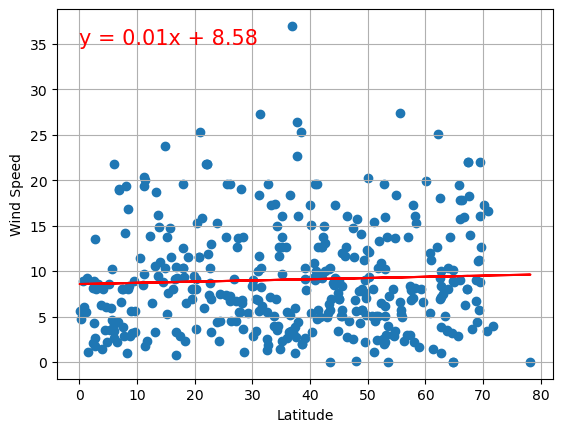

In [62]:
# Northern Hemisphere
def plot_linear_regression(x_values, y_values, text_coordinates):
   
    (slope, intercept, r_value, _, _) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    

    print(f"The r-value is: {r_value**2:.2f}")  
    
  
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")

    plt.ylabel("Wind Speed")
    plt.xlabel("Latitude")
    plt.grid(True)

    plt.savefig("output_data/Fig11.png")
    
    # Showing the plot
    plt.show()
    
    return slope, intercept, r_value

slope, intercept, r_value = plot_linear_regression(
    northern_hemi_df['Lat'], 
    northern_hemi_df['Wind Speed'], 
    (0, 35))  

## Discussion

In [ ]:
The r-value of 0.00 showss that there is no correlation between latitude and wind speed in the Northern Hemisphere. The regression equation y = 0.01x + 8.58 shows no impactful change in wind speed with latitude.

The r-value is: 0.13


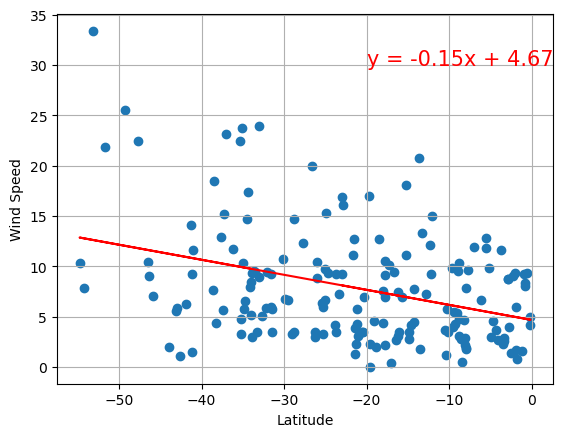

In [64]:
# Southern Hemisphere
def plot_linear_regression(x_values, y_values, text_coordinates):
   
    (slope, intercept, r_value, _, _) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    

    print(f"The r-value is: {r_value**2:.2f}")  
    
  
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")

    plt.ylabel("Wind Speed")
    plt.xlabel("Latitude")
    plt.grid(True)

    plt.savefig("output_data/Fig12.png")
    
    # Showing the plot
    plt.show()
    
    return slope, intercept, r_value

slope, intercept, r_value = plot_linear_regression(
    southern_hemi_df['Lat'], 
    southern_hemi_df['Wind Speed'], 
    (-20, 30))  

**Discussion about the linear relationship:** YOUR RESPONSE HERE

## Discussion

In [ ]:
The r-value of 0.13 showss a very weak correlation between latitude and wind speed in the Southern Hemisphere. The regression equation y = -0.15x + 4.67 shows that closer to the equator wind speed decreases.
